In [2]:
# Setup plotting
import matplotlib.pyplot as plt

# Install seaborn if not already installed
!pip install seaborn

# Check available styles to confirm the correct name
print(plt.style.available)

# Use the correct style name. Assuming 'seaborn-v0_8-whitegrid' is available based on common seaborn styles.
# If the print statement above shows a different name, use that one instead.
plt.style.use('seaborn-v0_8-whitegrid') # Changed style name

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex6 import *

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


ModuleNotFoundError: No module named 'learntools'

In [4]:
# Setup plotting
import matplotlib.pyplot as plt

# Install seaborn if not already installed
!pip install seaborn
# Install learntools
!pip install learntools

# Check available styles to confirm the correct name
print(plt.style.available)

# Use the correct style name. Assuming 'seaborn-v0_8-whitegrid' is available based on common seaborn styles.
# If the print statement above shows a different name, use that one instead.
plt.style.use('seaborn-v0_8-whitegrid') # Changed style name

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
# from learntools.core import binder
# binder.bind(globals())
# from learntools.deep_learning_intro.ex6 import *

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [5]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('/content/hotel.csv')

X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model = keras.Sequential([

    layers.BatchNormalization(input_shape=input_shape),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')

])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

Epoch 1/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - binary_accuracy: 0.7387 - loss: 0.5446 - val_binary_accuracy: 0.8021 - val_loss: 0.4355
Epoch 2/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - binary_accuracy: 0.7976 - loss: 0.4282 - val_binary_accuracy: 0.8095 - val_loss: 0.4073
Epoch 3/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - binary_accuracy: 0.8103 - loss: 0.4084 - val_binary_accuracy: 0.8143 - val_loss: 0.3967
Epoch 4/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - binary_accuracy: 0.8120 - loss: 0.4003 - val_binary_accuracy: 0.8162 - val_loss: 0.3910
Epoch 5/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - binary_accuracy: 0.8128 - loss: 0.4000 - val_binary_accuracy: 0.8198 - val_loss: 0.3876
Epoch 6/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - binary_accuracy: 0.8157 - loss: 0.3945 - val_binary_accuracy: 0.8220 - val_loss: 0.3831
Epoch 7/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - binary_accuracy: 0.8207 - loss: 0.3871 - val_binary_accuracy: 0.8261 - val_loss

<Axes: title={'center': 'Accuracy'}>

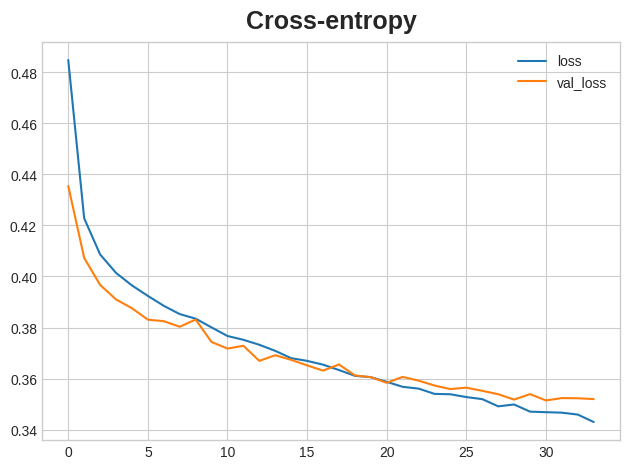

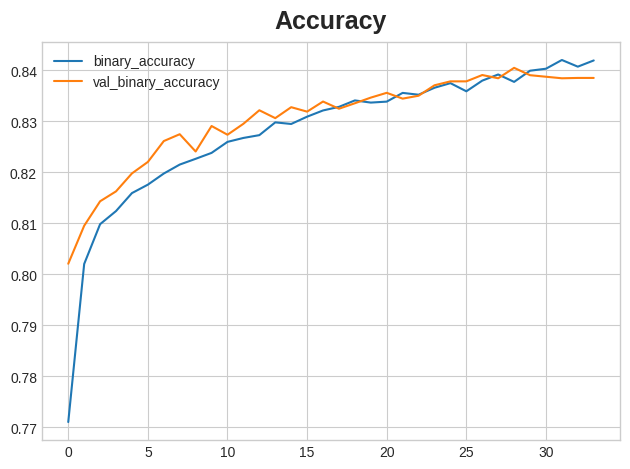

In [8]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [9]:
import pandas as pd
def custom_predict(model, preprocessor, data):
  """
  Makes a prediction using the trained model on custom input data.

  Args:
    model: The trained Keras model.
    preprocessor: The fitted column transformer.
    data: A dictionary or pandas DataFrame containing the features for a single prediction.

  Returns:
    The prediction made by the model.
  """
  # Ensure data is in a DataFrame format for preprocessing
  if isinstance(data, dict):
    data = pd.DataFrame([data])
  elif not isinstance(data, pd.DataFrame):
    raise TypeError("Input data must be a dictionary or pandas DataFrame.")

  # Preprocess the custom data
  processed_data = preprocessor.transform(data)

  # Make prediction
  prediction = model.predict(processed_data)

  return prediction[0][0]

# Example usage:
# Create sample custom data (replace with your actual custom data)
custom_data = {
    'lead_time': 50,
    'arrival_date_week_number': 25,
    'arrival_date_day_of_month': 15,
    'stays_in_weekend_nights': 2,
    'stays_in_week_nights': 3,
    'adults': 2,
    'children': 0,
    'babies': 0,
    'is_repeated_guest': 0,
    'previous_cancellations': 0,
    'previous_bookings_not_canceled': 0,
    'required_car_parking_spaces': 0,
    'total_of_special_requests': 1,
    'adr': 100.0,
    'hotel': 'Resort Hotel',
    'arrival_date_month': 'July', # Use month name as in original data
    'meal': 'BB',
    'market_segment': 'Online TA',
    'distribution_channel': 'TA/TO',
    'reserved_room_type': 'A',
    'deposit_type': 'No Deposit',
    'customer_type': 'Transient',
}

# Make a prediction
prediction = custom_predict(model, preprocessor, custom_data)
print(f"Prediction for custom data: {prediction}")

# Interpret the prediction (since the output is sigmoid, it's a probability)
if prediction > 0.5:
  print("The model predicts the booking will likely be canceled.")
else:
  print("The model predicts the booking will likely not be canceled.")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
Prediction for custom data: 0.3609097898006439
The model predicts the booking will likely not be canceled.
